In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm

from scipy import stats
from scipy.stats import norm, skew #for some statistics


In [2]:
train = pd.read_csv('../train.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


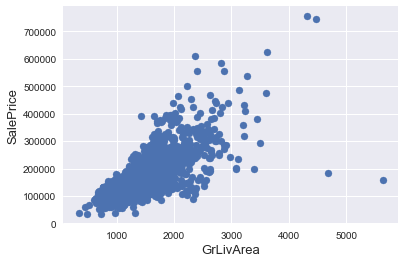

In [3]:
fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

In [4]:
model = sm.OLS.from_formula("SalePrice ~ scale(GrLivArea)", data=train)
result = model.fit()
print(model.fit().summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     1471.
Date:                Mon, 12 Mar 2018   Prob (F-statistic):          4.52e-223
Time:                        13:09:37   Log-Likelihood:                -18035.
No. Observations:                1460   AIC:                         3.607e+04
Df Residuals:                    1458   BIC:                         3.608e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1.809e+05   1467.490  

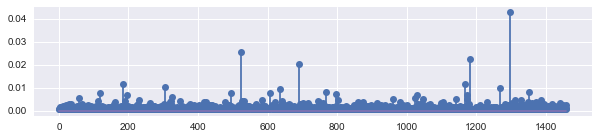

In [5]:
influence = result.get_influence()
hat = influence.hat_matrix_diag

plt.figure(figsize=(10, 2))
plt.stem(hat)
plt.show()

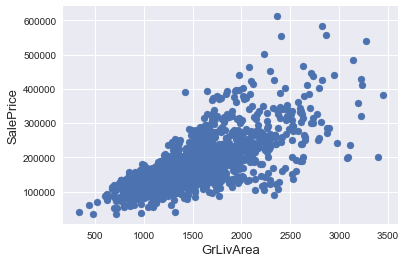

In [6]:
train_out = train
for i in range(len(hat)):
    if hat[i] > 0.01 :
        train_out = train_out.drop(i)
fig, ax = plt.subplots()
ax.scatter(x = train_out['GrLivArea'], y = train_out['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()


In [7]:
model = sm.OLS.from_formula("SalePrice ~ scale(GrLivArea)", data=train_out)
result = model.fit()
print(model.fit().summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.509
Model:                            OLS   Adj. R-squared:                  0.509
Method:                 Least Squares   F-statistic:                     1504.
Date:                Mon, 12 Mar 2018   Prob (F-statistic):          2.52e-226
Time:                        13:09:41   Log-Likelihood:                -17863.
No. Observations:                1453   AIC:                         3.573e+04
Df Residuals:                    1451   BIC:                         3.574e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1.796e+05   1387.107  

# log SalePrice

In [8]:
train_out["SalePrice"] = np.log1p(train_out["SalePrice"])
model = sm.OLS.from_formula("SalePrice ~ scale(GrLivArea)", data=train_out)
result = model.fit()
print(model.fit().summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.511
Model:                            OLS   Adj. R-squared:                  0.511
Method:                 Least Squares   F-statistic:                     1519.
Date:                Mon, 12 Mar 2018   Prob (F-statistic):          5.49e-228
Time:                        13:09:41   Log-Likelihood:                -186.34
No. Observations:                1453   AIC:                             376.7
Df Residuals:                    1451   BIC:                             387.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           12.0199      0.007  

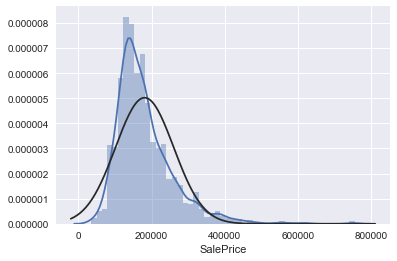

In [9]:
sns.distplot(train['SalePrice'] , fit=norm);

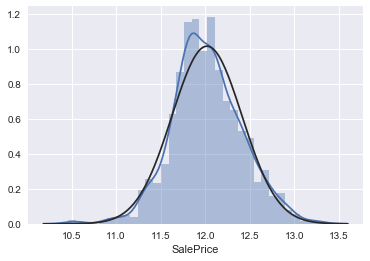

In [10]:
sns.distplot(train_out['SalePrice'] , fit=norm);

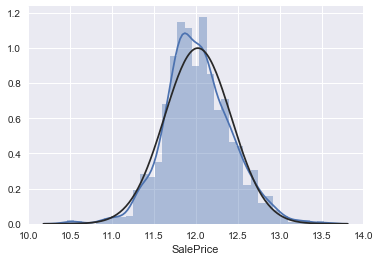

In [11]:
train_log = train
train_log["SalePrice"] = np.log(train["SalePrice"])
sns.distplot(train_log['SalePrice'] , fit=norm);

In [12]:
model = sm.OLS.from_formula("SalePrice ~ scale(GrLivArea)", data=train_log)
result = model.fit()
print(model.fit().summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.491
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                     1408.
Date:                Mon, 12 Mar 2018   Prob (F-statistic):          3.06e-216
Time:                        13:09:42   Log-Likelihood:                -237.96
No. Observations:                1460   AIC:                             479.9
Df Residuals:                    1458   BIC:                             490.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           12.0241      0.007  

## Cook's Distance

In [13]:
X0=train['GrLivArea']
y=train['SalePrice']

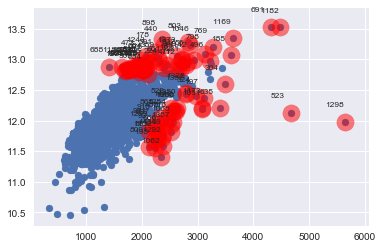

In [14]:
from statsmodels.graphics import utils

cooks_d2, pvals = influence.cooks_distance
fox_cr = 4 / (len(y) - 2)
idx = np.where(cooks_d2 > fox_cr)[0]

ax = plt.subplot()
plt.scatter(X0, y)
plt.scatter(X0[idx], y[idx], s=300, c="r", alpha=0.5)
utils.annotate_axes(range(len(idx)), idx, 
                    list(zip(X0[idx], y[idx])), [(-20, 15)] * len(idx), size="small", ax=ax)
plt.show()

너무 많은 데이터를 아웃라이어로 지정해서 Cook's Distance는 쓰기 힘들것 같다

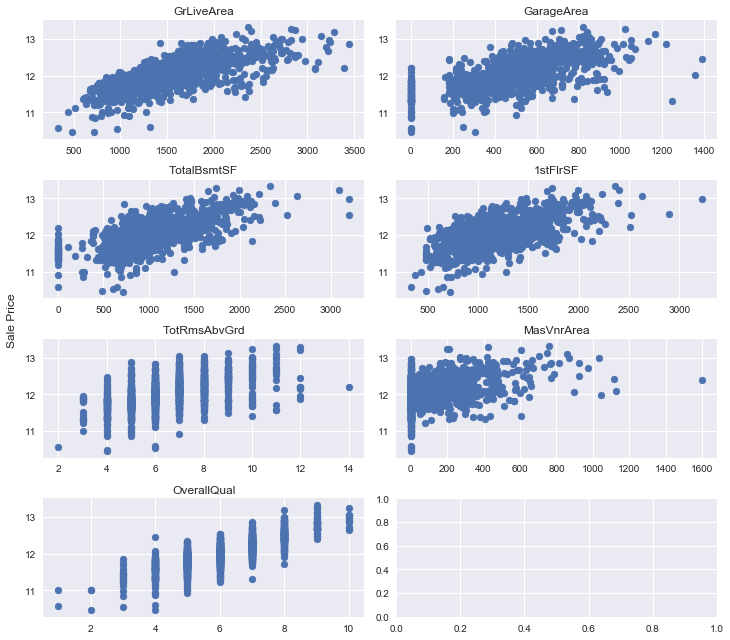

In [37]:
df = train_out
plt.figure(1)
f, axarr = plt.subplots(4, 2, figsize=(10, 9))
price = df.SalePrice.values
axarr[0, 0].scatter(df.GrLivArea.values, price)
axarr[0, 0].set_title('GrLiveArea')
axarr[0, 1].scatter(df.GarageArea.values, price)
axarr[0, 1].set_title('GarageArea')
axarr[1, 0].scatter(df.TotalBsmtSF.values, price)
axarr[1, 0].set_title('TotalBsmtSF')
axarr[1, 1].scatter(df['1stFlrSF'].values, price)
axarr[1, 1].set_title('1stFlrSF')
axarr[2, 0].scatter(df.TotRmsAbvGrd.values, price)
axarr[2, 0].set_title('TotRmsAbvGrd')
axarr[2, 1].scatter(df.MasVnrArea.values, price)
axarr[2, 1].set_title('MasVnrArea')
axarr[3, 0].scatter(df.OverallQual.values, price)
axarr[3, 0].set_title('OverallQual')
f.text(-0.01, 0.5, 'Sale Price', va='center', rotation='vertical', fontsize = 12)
plt.tight_layout()
plt.show()

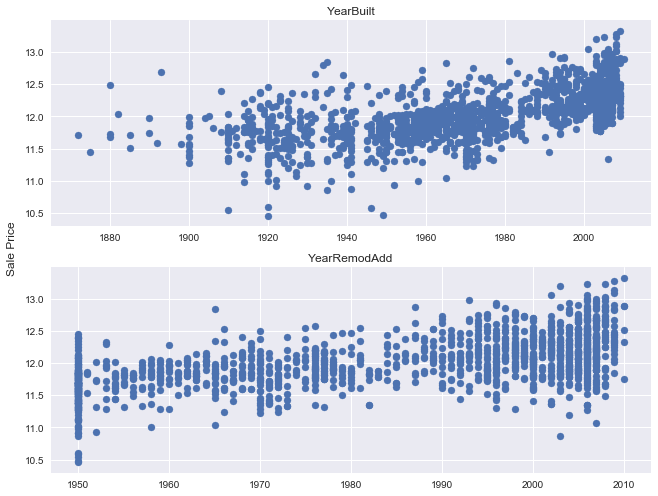

In [16]:
fig = plt.figure(2, figsize=(9, 7))
plt.subplot(211)
plt.scatter(df.YearBuilt.values, price)
plt.title('YearBuilt')

plt.subplot(212)
plt.scatter(df.YearRemodAdd.values, price)
plt.title('YearRemodAdd')

fig.text(-0.01, 0.5, 'Sale Price', va = 'center', rotation = 'vertical', fontsize = 12)

plt.tight_layout()


## Categorical Features

In [17]:
print(df.select_dtypes(include=['object']).columns.values)

['MSZoning' 'Street' 'Alley' 'LotShape' 'LandContour' 'Utilities'
 'LotConfig' 'LandSlope' 'Neighborhood' 'Condition1' 'Condition2'
 'BldgType' 'HouseStyle' 'RoofStyle' 'RoofMatl' 'Exterior1st'
 'Exterior2nd' 'MasVnrType' 'ExterQual' 'ExterCond' 'Foundation'
 'BsmtQual' 'BsmtCond' 'BsmtExposure' 'BsmtFinType1' 'BsmtFinType2'
 'Heating' 'HeatingQC' 'CentralAir' 'Electrical' 'KitchenQual'
 'Functional' 'FireplaceQu' 'GarageType' 'GarageFinish' 'GarageQual'
 'GarageCond' 'PavedDrive' 'PoolQC' 'Fence' 'MiscFeature' 'SaleType'
 'SaleCondition']


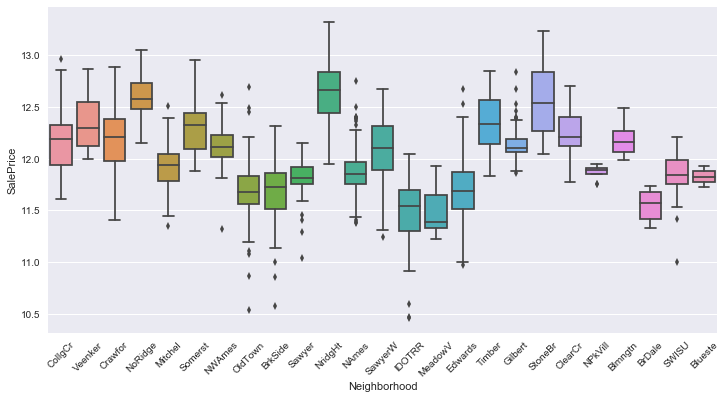

In [18]:
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'Neighborhood', y = 'SalePrice',  data = df)
xt = plt.xticks(rotation=45)


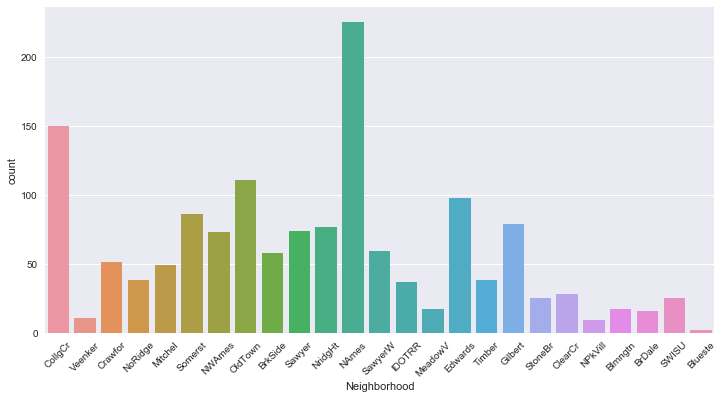

In [19]:
plt.figure(figsize = (12, 6))
sns.countplot(x = 'Neighborhood', data = df)
xt = plt.xticks(rotation=45)

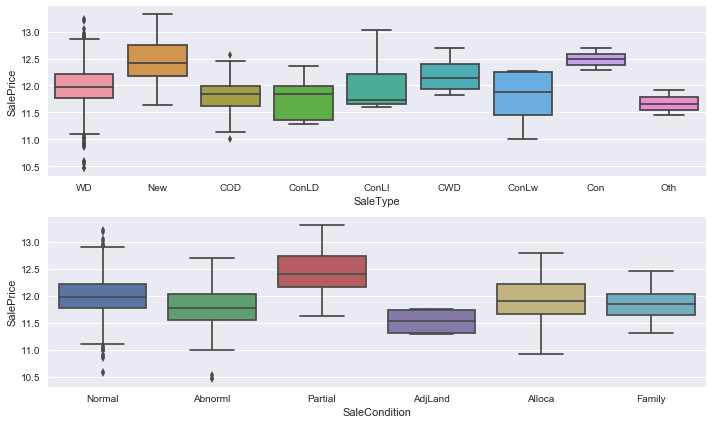

In [20]:
fig, ax = plt.subplots(2, 1, figsize = (10, 6))
sns.boxplot(x = 'SaleType', y = 'SalePrice', data = df, ax = ax[0])
sns.boxplot(x = 'SaleCondition', y = 'SalePrice', data = df, ax = ax[1])
plt.tight_layout()

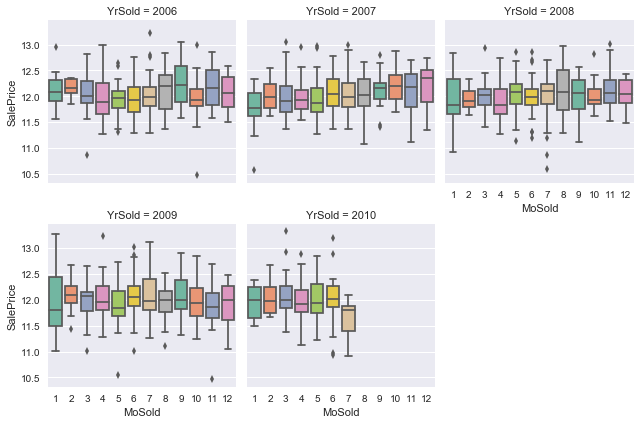

In [21]:
g = sns.FacetGrid(df, col = 'YrSold', col_wrap = 3)
g.map(sns.boxplot, 'MoSold', 'SalePrice', palette='Set2', order = range(1, 13))
plt.tight_layout()

#### 연도은 집에 막대한 영향을 미치지 않는 것 같다.

### Housing Style

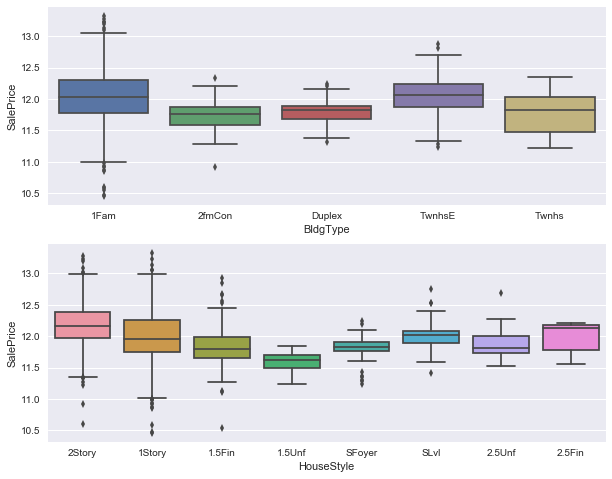

In [22]:
fig, ax = plt.subplots(2, 1, figsize = (10, 8))
sns.boxplot(x = 'BldgType', y = 'SalePrice', data = df, ax = ax[0])
sns.boxplot(x = 'HouseStyle', y = 'SalePrice', data = df, ax = ax[1])


### Housing Condition

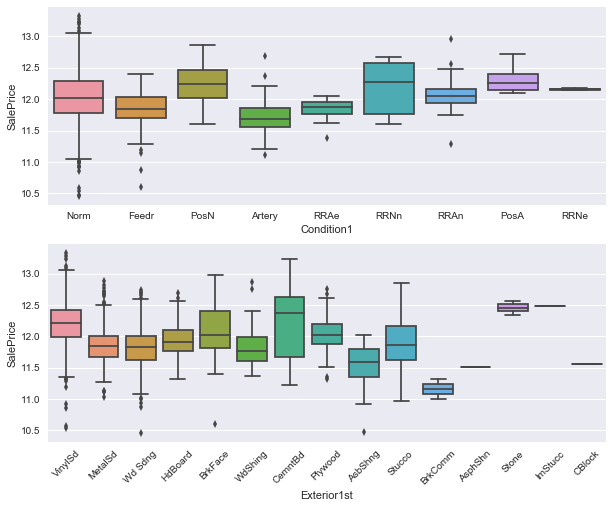

In [23]:
fig, ax = plt.subplots(2, 1, figsize = (10, 8))
sns.boxplot(x = 'Condition1', y = 'SalePrice', data = df, ax = ax[0])
sns.boxplot(x = 'Exterior1st', y = 'SalePrice', data = df, ax = ax[1])
x = plt.xticks(rotation = 45)
plt.show()

### Basement Conditions

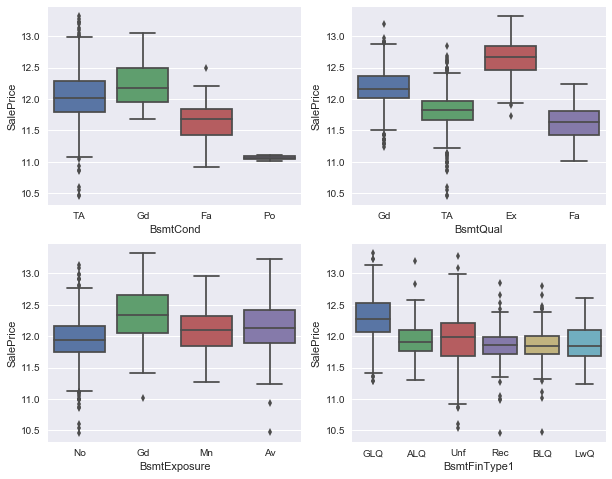

In [24]:
fig, ax = plt.subplots(2, 2, figsize = (10, 8))
sns.boxplot('BsmtCond', 'SalePrice', data = df, ax = ax[0, 0])
sns.boxplot('BsmtQual', 'SalePrice', data = df, ax = ax[0, 1])
sns.boxplot('BsmtExposure', 'SalePrice', data = df, ax = ax[1, 0])
sns.boxplot('BsmtFinType1', 'SalePrice', data = df, ax = ax[1, 1])

### Home Functionality

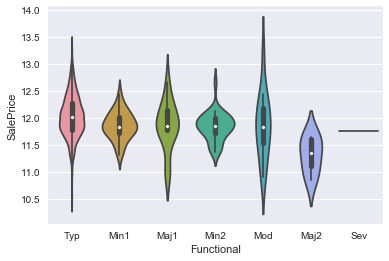

In [25]:
sns.violinplot('Functional', 'SalePrice', data = df)

### FirePlaceQu

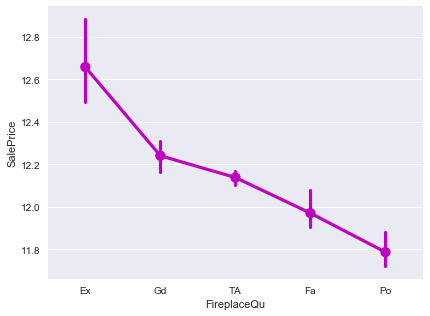

In [26]:
sns.factorplot('FireplaceQu', 'SalePrice', data = df, color = 'm', \
               estimator = np.median, order = ['Ex', 'Gd', 'TA', 'Fa', 'Po'], size = 4.5,  aspect=1.35)

In [ ]:
MSZoning